In [1]:
!gdown 1wnKRFG-Ay9aHVttpZnFBqBZIv2HR2RKE

Downloading...
From: https://drive.google.com/uc?id=1wnKRFG-Ay9aHVttpZnFBqBZIv2HR2RKE
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 72.9MB/s]


In [2]:
import pandas as pd

file_path = '/content/heart.csv'
data = pd.read_csv(file_path)

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)


In [4]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Test AUC: 0.835579128440367
Test Recall: 0.8390243902439024
Test F1-score: 0.8390243902439024
Test Precision: 0.8390243902439024
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        96
           1       0.82      0.89      0.85       109

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



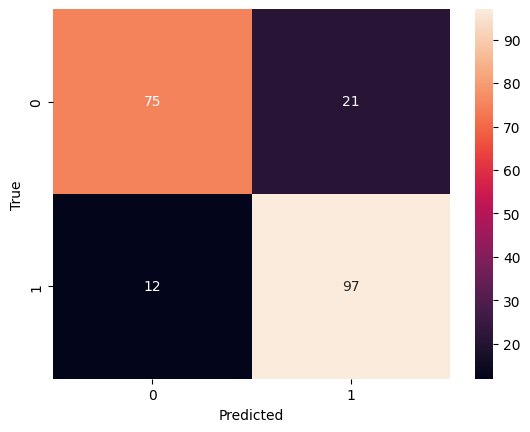

In [7]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix

y_pred = gnb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)


print(class_report)


import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix

y_pred = gnb.predict(X_test)


# Additional metrics
auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print('in micro:')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)


# Additional metrics
auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
print('in macro:')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)


in micro:
Test AUC: 0.835579128440367
Test Recall: 0.8390243902439024
Test F1-score: 0.8390243902439024
Test Precision: 0.8390243902439024
in macro:
Test AUC: 0.835579128440367
Test Recall: 0.835579128440367
Test F1-score: 0.837148840904167
Test Precision: 0.842051431911163


In [ ]:
import numpy as np

# Select five random data points from the test set
random_indices = np.random.choice(X_test.index, size=10, replace=False)
random_samples = X_test.loc[random_indices]
random_actual = y_test.loc[random_indices]
random_predicted = gnb.predict(random_samples)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': random_actual,
    'Predicted': random_predicted
})

comparison_df

,Actual,Predicted
457,1,1
787,0,0
176,0,0
524,0,0
136,1,1
581,1,1
3,0,1
55,0,0
567,1,1
183,1,1
